Mustafa Yesilyurt CS 178, Prof. Alexander Ihler, HW 3, 11/11/19

In [1]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Problem 1: Logistic Regression

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1
For each of the two datasets, create a separate scatter plot in which the training data from the two classes is plotted in different colors. Which of the two datasets is linearly separable?

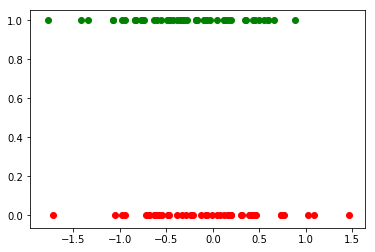

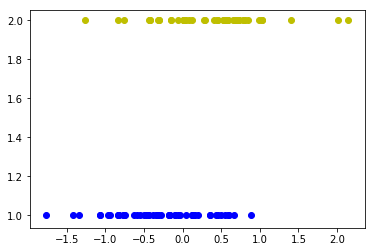

In [3]:
XA0, YA0 = X[Y==0,:], Y[Y==0]
XA1, YA1 = X[Y==1,:], Y[Y==1]
#print("shapes of XA0 and YA0:",XA0.shape,YA0.shape)
#print("XA0\n", XA0)
#print("YA0\n", YA0)
XA0_avg = []
for pairing in XA0:
    XA0_avg.append(.5 * (pairing[0]+pairing[1]))
XA1_avg = []
for pairing in XA1:
    XA1_avg.append(.5 * (pairing[0]+pairing[1]))
#print(XA0_avg)
plt.scatter(x=XA0_avg, y=YA0, c="r")
plt.scatter(x=XA1_avg, y=YA1, c="g")
plt.show()


XB0, YB0 = X[Y==1,:], Y[Y==1]
XB1, YB1 = X[Y==2,:], Y[Y==2]
XB0_avg = []
for pairing in XB0:
    XB0_avg.append(.5 * (pairing[0]+pairing[1]))
XB1_avg = []
for pairing in XB1:
    XB1_avg.append(.5 * (pairing[0]+pairing[1]))
plt.scatter(x=XB0_avg, y=YB0, c="b")
plt.scatter(x=XB1_avg, y=YB1, c="y")
plt.show()


We can clearly see that both datasets are linearly separable. The first plot can be separated with the line y=0.5 and the second with y=1.5.

### P1.2

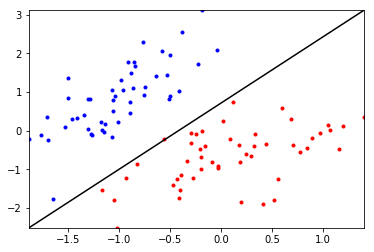

In [11]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = np.array([ax[2],ax[3]]);      # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2, 6, -1])#NotImplementedError;  # TODO: insert hard-coded values
learnerA.plotBoundary(XA,YA)

plt.show()

### P1.3

In [36]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    #raise NotImplementedError
    Yhat = []
    for i in X:
        val  = self.theta[0] + (self.theta[1] * i[0]) + (self.theta[2] * i[1])
        if val > 0:
            Yhat.append(self.classes[1])
        else:
            Yhat.append(self.classes[0])
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if r[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    return np.array(Yhat)


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2, 6, -1])  #NotImplementedError;  # TODO: insert hard-coded values

print("Error A: ", learnerA.err(XA,YA))

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2, 6, -1])  #NotImplementedError;  # TODO: insert hard-coded values

print("Error B: ", learnerB.err(XB,YB))

Error A:  0.0606060606061
Error B:  0.454545454545


### P1.4

If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

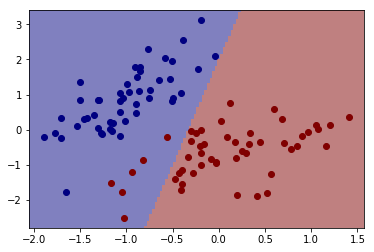

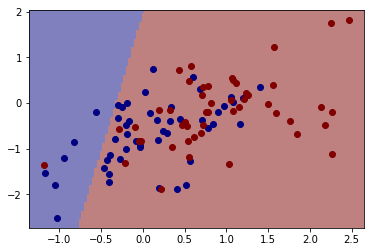

In [38]:
ml.plotClassify2D(learnerA,XA,YA)
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

Here is an example of latex equations that may be useful for expressing the gradient:

### P1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = (something)$$

##### For my solution to 1.5, see the handwritten solutions at the end of the document. Problems 2 and 3 are found there as well. Thank you.

### P1.6 and 1.7

Now define the train function and complete its missing code.

In [61]:
def sigmoid(z):
    """Sigmoid function. """
    return 1. / (1 + np.exp(-z))

In [84]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            #print("[",self.theta[0], self.theta[1], self.theta[2],"]")
            ri    = np.dot(XX[i], self.theta);     # TODO: compute linear response r(x)
            gradi = (sigmoid(ri) - YY[i])*XX[i];     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        #Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jsur = 0
        for ind in range(XX.shape[0]):
            if YY[ind] == 0:
                Jsur += np.log10([1-sigmoid(np.dot(XX[ind], self.theta))])[0]
            else:
                Jsur += np.log10([sigmoid(np.dot(XX[ind], self.theta))])[0]
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        if epoch > stopEpochs or (epoch > 1 and(Jnll[len(Jnll)-1]-Jnll[len(Jnll)-2]) < stopTol):
            done = True;   # or if Jnll not changing between epochs ( < stopTol )

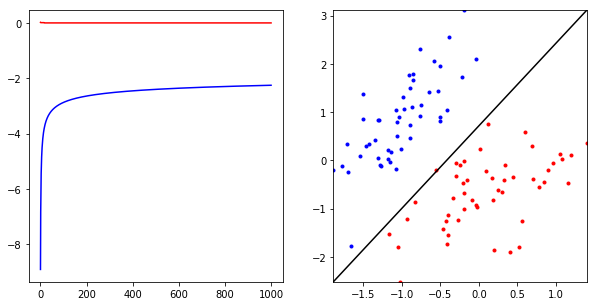

In [86]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

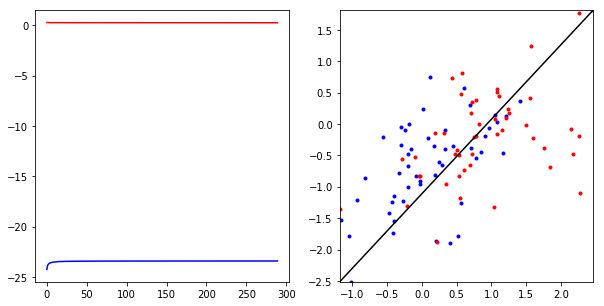

In [87]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots

learnerB = logisticClassify2()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

Training error rate A:  0.030303030303


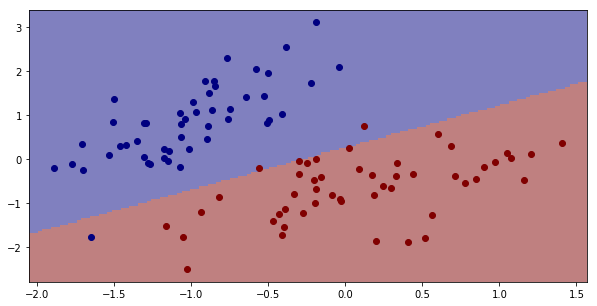

Training error rate B:  0.454545454545


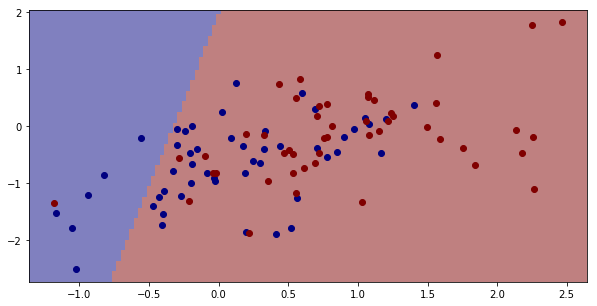

In [65]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate A: ",learnerA.err(XA,YA))

plt.show()
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate B: ",learnerB.err(XB,YB))

plt.show()